In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y98.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y155.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y251.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y243.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y242.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y60.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y113.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y111.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y167.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y34.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y255.JPG
/kaggle/input

In [2]:
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
import seaborn as sb

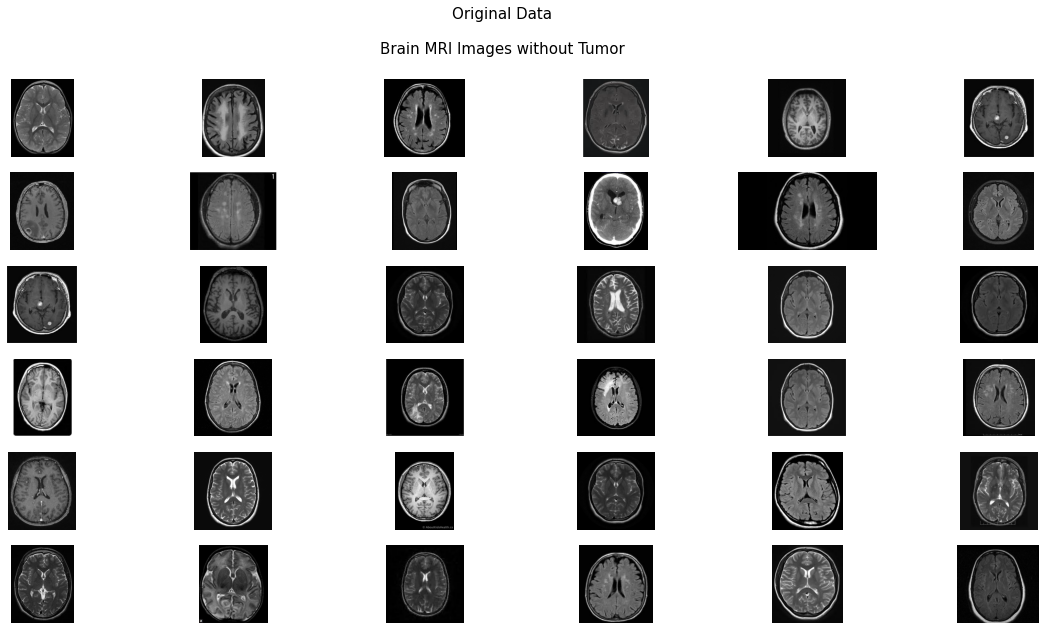

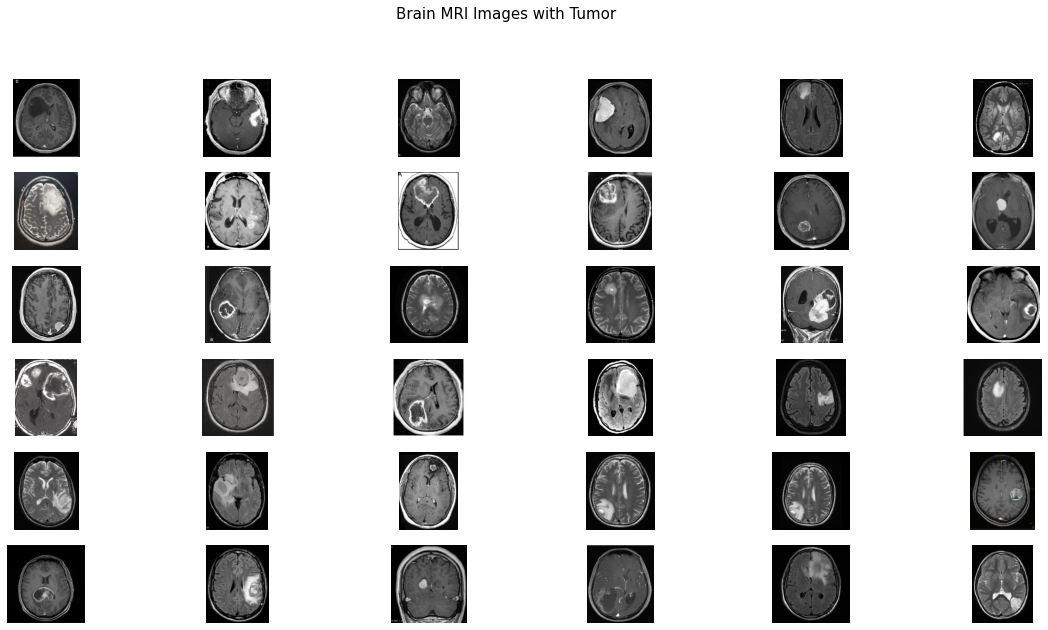

In [3]:
aug=[10,20]

#The two categories present in our dataset
categories=['no','yes']

#Display some of the images from the original dataset
for category in categories:
    win=plt.figure(figsize=(20,10))
    if category=='no':
        win.suptitle("Original Data\n\nBrain MRI Images without Tumor", fontsize=15)
    else:
        win.suptitle("Brain MRI Images with Tumor", fontsize=15) 
    index=1
    for img in os.listdir(os.path.join("/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset",category)):
        image=cv2.imread(os.path.join("/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset",category,img))
        try:
            win.add_subplot(6,6,index)
            plt.imshow(image)
            plt.axis('off')
            index=index+1
        except:
            break
    plt.show()

In [4]:
if not os.path.exists("Augmented_Data"):
    os.makedirs("Augmented_Data")

In [5]:
os.makedirs("Augmented_Data/no")
os.makedirs("Augmented_Data/yes")

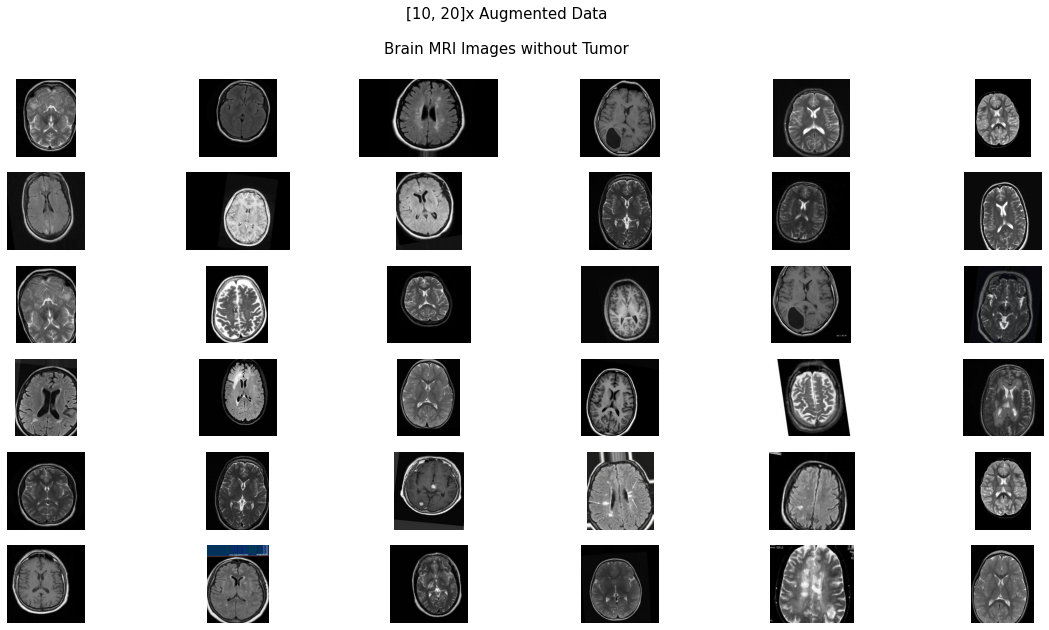

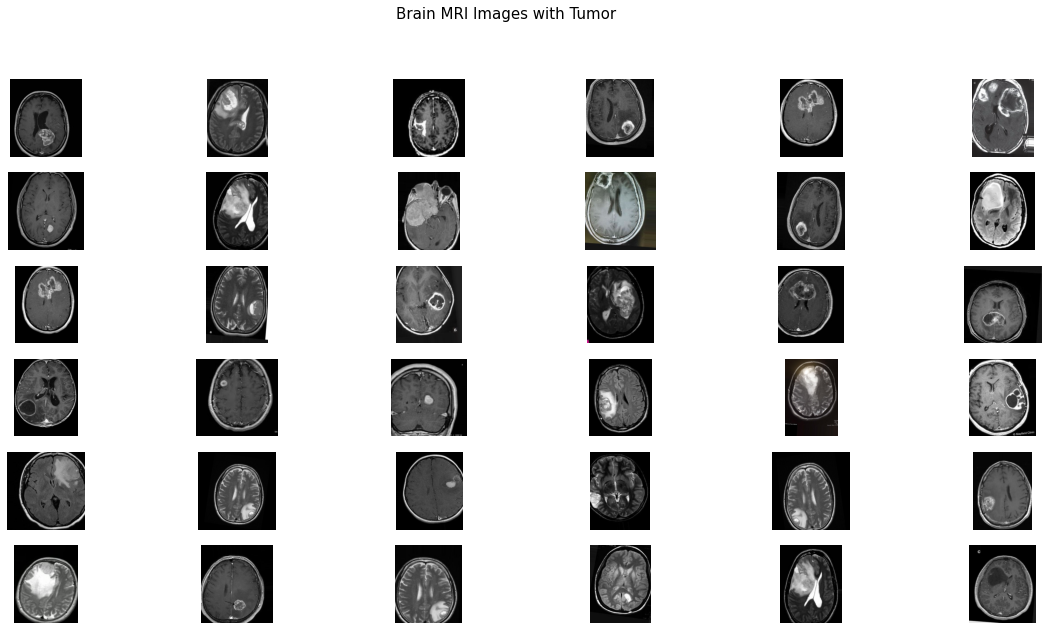

In [6]:
#Create an augmented image generator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,horizontal_flip=True,shear_range=0.15,rotation_range=10)

#Read the original data and generate augmented images from that original data and save the augmented data in augmented data directory
for category in categories:
    n=0
    for img in os.listdir(os.path.join("/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset",category)):
        n=n+1
        image=cv2.imread(os.path.join("/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset",category,img))
        image=np.expand_dims(image,0)
        i=0
        for img in datagen.flow(image,save_to_dir=os.path.join("Augmented_Data", category),save_format='jpg',save_prefix=n):
            i=i+1
            if i == 20:
                break

    #Display some of the images from the augmented dataset
    win=plt.figure(figsize=(20,10))
    if category=='no':
        win.suptitle(str(aug)+'x Augmented Data\n\nBrain MRI Images without Tumor', fontsize=15)
    else:
        win.suptitle("Brain MRI Images with Tumor", fontsize=15)
    index=1
    for img in os.listdir(os.path.join("Augmented_Data",category)):
        image=cv2.imread(os.path.join("Augmented_Data",category,img))
        try:
            win.add_subplot(6,6,index)
            plt.imshow(image)
            plt.axis('off')
            index=index+1
        except:
            break
    plt.show()

In [7]:
key = []
x = []
for category in categories:
    n=0
    for img in os.listdir(os.path.join("Augmented_Data",category)):
        image=cv2.imread(os.path.join("Augmented_Data",category,img))
        image = cv2.resize(image, (225, 225))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if category == 'no':
            key.append(0)
            x.append(image)
        else:
            key.append(1)
            x.append(image)

In [8]:
key = np.array(key)
x = np.array(x)

In [9]:
x.shape

(5058, 225, 225)

In [10]:
x = x.reshape(x.shape[0], 225, 225, 1)

In [11]:
x.shape

(5058, 225, 225, 1)

In [12]:
x = x/255.

In [13]:
import numpy as np
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf

batch_size = 1
num_classes = 1
epochs = 50

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, key, test_size=0.05, random_state=42)
y_test.shape

(253,)

In [15]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [16]:
np.save('x_train.npy', x_train)
np.save('x_test.npy', x_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(225,225,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(1, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(1, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(640, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.0001),
             metrics=['acc'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 1)       10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 1)       10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 1)         10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 676)               0

In [19]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 4805 samples, validate on 253 samples
Epoch 1/50
4805/4805 [==============================] - 26s 5ms/sample - loss: 0.5403 - acc: 0.7488 - val_loss: 0.5213 - val_acc: 0.7708
Epoch 2/50
4805/4805 [==============================] - 20s 4ms/sample - loss: 0.5013 - acc: 0.7838 - val_loss: 0.5250 - val_acc: 0.7787
Epoch 3/50
4805/4805 [==============================] - 21s 4ms/sample - loss: 0.4885 - acc: 0.7933 - val_loss: 0.5367 - val_acc: 0.7747
Epoch 4/50
4805/4805 [==============================] - 20s 4ms/sample - loss: 0.4865 - acc: 0.7960 - val_loss: 0.5297 - val_acc: 0.7668
Epoch 5/50
4805/4805 [==============================] - 21s 4ms/sample - loss: 0.4812 - acc: 0.8004 - val_loss: 0.5328 - val_acc: 0.7708
Epoch 6/50
4805/4805 [==============================] - 21s 4ms/sample - loss: 0.4757 - acc: 0.8000 - val_loss: 0.5264 - val_acc: 0.7668
Epoch 7/50
4805/4805 [==============================] - 20s 4ms/sample - loss: 0.4767 - acc: 0.8031 - val_loss: 0.5290 - val_acc: 0

In [20]:
model.save('fft_model.h5')